<a href="https://colab.research.google.com/github/KOWSALYAAARU/test_app/blob/main/Tatamoter_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from pandas import Series
from numpy import log

#!pip install plotly
import plotly.express as px # high level interface
import plotly.graph_objects as go # lower level interface

In [2]:
#creating pandas df
df=pd.read_csv('TATAMOTORS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0
1,2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0
2,2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816772,7979598.0
3,2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395966,9232656.0
4,2015-01-08,498.651459,509.336853,495.683289,506.566559,503.235260,5535587.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2385 non-null   object 
 1   Open       2384 non-null   float64
 2   High       2384 non-null   float64
 3   Low        2384 non-null   float64
 4   Close      2384 non-null   float64
 5   Adj Close  2384 non-null   float64
 6   Volume     2384 non-null   float64
dtypes: float64(6), object(1)
memory usage: 130.6+ KB


In [4]:
df['Open'].value_counts()

,count
Open,
400.000000,7
424.000000,7
436.000000,6
460.000000,6
423.000000,6
...,...
276.399994,1
274.600006,1
262.000000,1


In [5]:
df['Date']=pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2385 non-null   datetime64[ns]
 1   Open       2384 non-null   float64       
 2   High       2384 non-null   float64       
 3   Low        2384 non-null   float64       
 4   Close      2384 non-null   float64       
 5   Adj Close  2384 non-null   float64       
 6   Volume     2384 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 130.6 KB


In [7]:
df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0
1,2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0
2,2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816772,7979598.0
3,2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395966,9232656.0
4,2015-01-08,498.651459,509.336853,495.683289,506.566559,503.235260,5535587.0


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

,0
Date,0
Open,1
High,1
Low,1
Close,1
Adj Close,1
Volume,1


In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


# Durbin-wastson **Test**

In [13]:
import statsmodels.api as sm
print(sm.stats.durbin_watson(df['Open']))
print(sm.stats.durbin_watson(df['Volume']))
print(sm.stats.durbin_watson(df['High']))
print(sm.stats.durbin_watson(df['Low']))
print(sm.stats.durbin_watson(df['Close']))
print(sm.stats.durbin_watson(df['Adj Close']))


0.00043814847615948204
0.2706742379953918
0.00037089605499325583
0.0004368124482089187
0.0004558154073906643
0.000455619223384257


In [14]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2384,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2.384000e+03
mean,2019-11-02 12:48:19.328859136,404.445044,409.673919,398.248231,403.676186,401.528371,2.370178e+07
min,2015-01-02 00:00:00,66.500000,66.900002,63.500000,65.300003,64.896851,1.154721e+06
25%,2017-06-05 18:00:00,260.000000,263.437500,255.875000,258.799988,257.202179,7.364087e+06
50%,2019-11-07 12:00:00,406.825012,411.375000,400.550003,404.875000,402.237304,1.236892e+07
75%,2022-03-31 06:00:00,484.974998,493.100006,478.125008,485.800010,482.751846,2.720649e+07
max,2024-09-02 00:00:00,1167.000000,1179.000000,1145.300049,1161.849976,1161.849976,3.905778e+08
std,NaN,213.803021,215.590108,211.386080,213.511149,213.079466,3.040412e+07


In [15]:
df.nunique()

,0
Date,2384
Open,1904
High,2075
Low,2077
Close,2142
Adj Close,2197
Volume,2384


In [16]:
df1=df.copy()

In [17]:
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0
1,2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0
2,2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816772,7979598.0
3,2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395966,9232656.0
4,2015-01-08,498.651459,509.336853,495.683289,506.566559,503.235260,5535587.0
...,...,...,...,...,...,...,...
2380,2024-08-27,1093.050049,1096.650024,1075.000000,1077.250000,1077.250000,8813305.0
2381,2024-08-28,1082.949951,1088.699951,1070.099976,1074.550049,1074.550049,8145376.0
2382,2024-08-29,1079.050049,1142.000000,1066.000000,1121.650024,1121.650024,40658159.0
2383,2024-08-30,1113.949951,1115.000000,1097.449951,1111.349976,1111.349976,17647545.0


In [17]:
df1.set_index('Date',inplace=True)

In [18]:
df1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0
2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0
2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816772,7979598.0
2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395966,9232656.0
2015-01-08,498.651459,509.336853,495.683289,506.566559,503.235260,5535587.0
...,...,...,...,...,...,...
2024-08-27,1093.050049,1096.650024,1075.000000,1077.250000,1077.250000,8813305.0
2024-08-28,1082.949951,1088.699951,1070.099976,1074.550049,1074.550049,8145376.0
2024-08-29,1079.050049,1142.000000,1066.000000,1121.650024,1121.650024,40658159.0


In [19]:
start_date = df1.index.min()
end_date =  df1.index.max()
print("Start Date of Stocks:",start_date)
print("End Date of Stocks:",end_date)

Start Date of Stocks: 2015-01-02 00:00:00
End Date of Stocks: 2024-09-02 00:00:00


<Axes: xlabel='Date'>

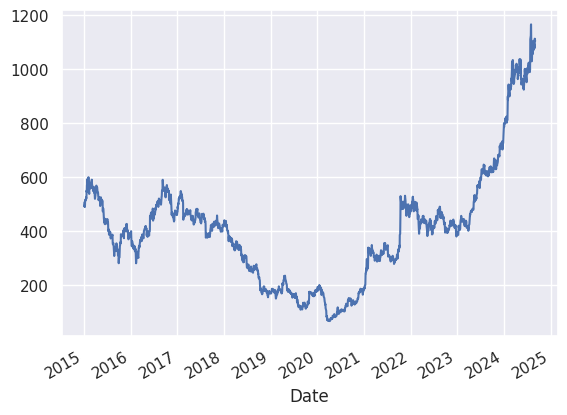

In [20]:
df1['Open'].plot()

In [21]:
df1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0
2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0
2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816772,7979598.0
2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395966,9232656.0
2015-01-08,498.651459,509.336853,495.683289,506.566559,503.235260,5535587.0
...,...,...,...,...,...,...
2024-08-27,1093.050049,1096.650024,1075.000000,1077.250000,1077.250000,8813305.0
2024-08-28,1082.949951,1088.699951,1070.099976,1074.550049,1074.550049,8145376.0
2024-08-29,1079.050049,1142.000000,1066.000000,1121.650024,1121.650024,40658159.0


In [22]:
import matplotlib.pyplot as plt


<Axes: xlabel='Date'>

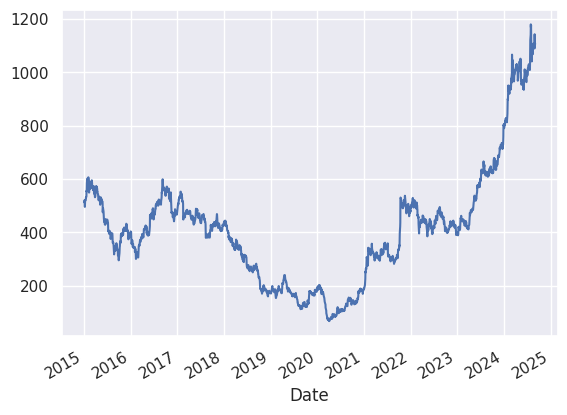

In [23]:
df1['High'].plot()

In [24]:
df1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0
2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0
2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816772,7979598.0
2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395966,9232656.0
2015-01-08,498.651459,509.336853,495.683289,506.566559,503.235260,5535587.0
...,...,...,...,...,...,...
2024-08-27,1093.050049,1096.650024,1075.000000,1077.250000,1077.250000,8813305.0
2024-08-28,1082.949951,1088.699951,1070.099976,1074.550049,1074.550049,8145376.0
2024-08-29,1079.050049,1142.000000,1066.000000,1121.650024,1121.650024,40658159.0


In [25]:
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0
1,2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0


In [26]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0
1,2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0
2,2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816772,7979598.0
3,2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395966,9232656.0
4,2015-01-08,498.651459,509.336853,495.683289,506.566559,503.235260,5535587.0


In [27]:
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0
2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0
2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816772,7979598.0
2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395966,9232656.0
2015-01-08,498.651459,509.336853,495.683289,506.566559,503.235260,5535587.0


In [28]:
df1['Open'].nunique()

1904

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2384 entries, 2015-01-02 to 2024-09-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2384 non-null   float64
 1   High       2384 non-null   float64
 2   Low        2384 non-null   float64
 3   Close      2384 non-null   float64
 4   Adj Close  2384 non-null   float64
 5   Volume     2384 non-null   float64
dtypes: float64(6)
memory usage: 130.4 KB


<Axes: xlabel='Date'>

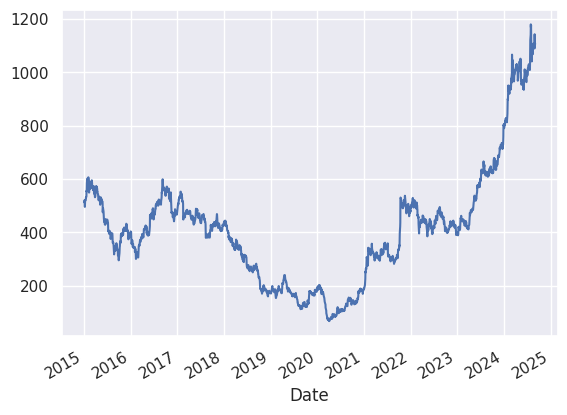

In [30]:
df1['High'].plot()

<Axes: xlabel='Date'>

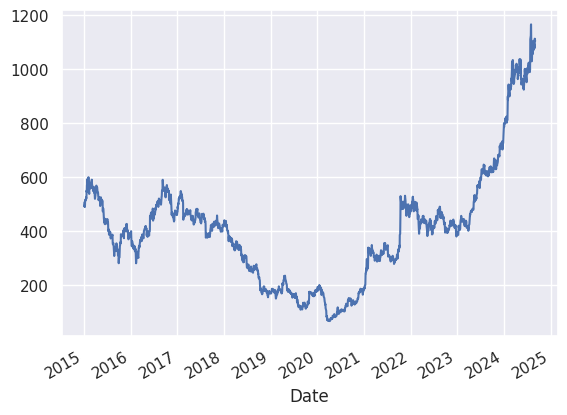

In [31]:
df1['Open'].plot()

In [32]:
df1['Time_Stamp']=pd.DataFrame(df,columns=['Date'])
df1.head()

,Open,High,Low,Close,Adj Close,Volume,Time_Stamp
Date,,,,,,,
2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0,NaT
2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0,NaT
2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816772,7979598.0,NaT
2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395966,9232656.0,NaT
2015-01-08,498.651459,509.336853,495.683289,506.566559,503.235260,5535587.0,NaT


In [33]:
df1['Time_Stamp'] = pd.to_datetime(df1['Time_Stamp'])


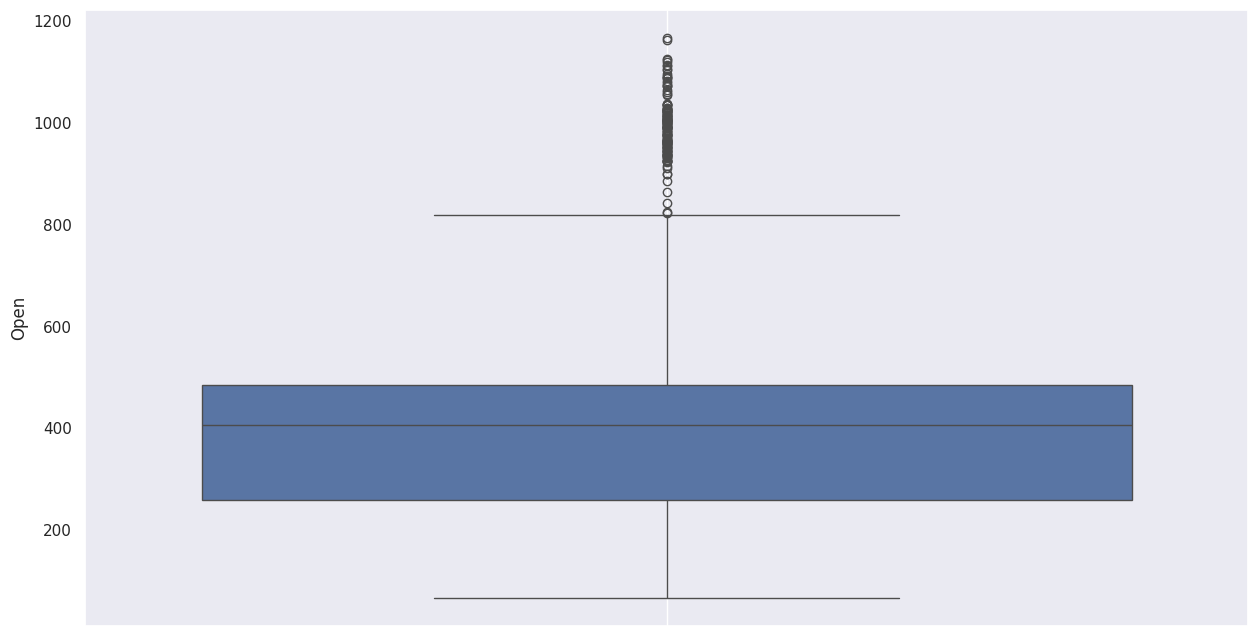

In [34]:
plt.figure(figsize=(15,8))
sns.boxplot(df1['Open'])
plt.grid()

In [42]:
df1

,Open,High,Low,Close,Adj Close,Volume,Time_Stamp
Date,,,,,,,
2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0,NaT
2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0,NaT
2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816772,7979598.0,NaT
2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395966,9232656.0,NaT
2015-01-08,498.651459,509.336853,495.683289,506.566559,503.235260,5535587.0,NaT
...,...,...,...,...,...,...,...
2024-08-27,1093.050049,1096.650024,1075.000000,1077.250000,1077.250000,8813305.0,NaT
2024-08-28,1082.949951,1088.699951,1070.099976,1074.550049,1074.550049,8145376.0,NaT
2024-08-29,1079.050049,1142.000000,1066.000000,1121.650024,1121.650024,40658159.0,NaT


In [43]:
start_date = df1.index.min()
end_date = df1.index.max()
print("Start Date of Stocks :", start_date)
print("End Date of Stocks :", end_date)

Start Date of Stocks : 2015-01-02 00:00:00
End Date of Stocks : 2024-09-02 00:00:00


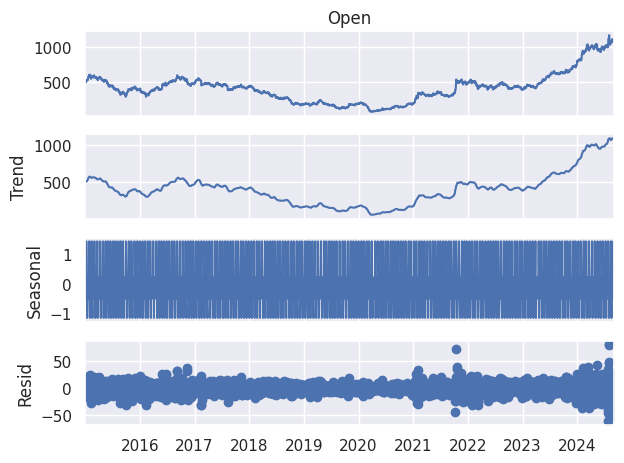

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompse = seasonal_decompose(df1['Open'], model='additive', period=12)
decompse.plot()
plt.show()

In [45]:
trend = decompse.trend
seasonality = decompse.seasonal
residual = decompse.resid

print('Trend', '\n', trend.head(12),'\n')
print('Seasoanlity', '\n', seasonality.head(12),'\n')
print('Residual', '\n', residual.head(12),'\n')

Trend 
 Date
2015-01-02           NaN
2015-01-05           NaN
2015-01-06           NaN
2015-01-07           NaN
2015-01-08           NaN
2015-01-09           NaN
2015-01-12    511.921628
2015-01-13    515.559691
2015-01-14    518.983385
2015-01-15    523.777793
2015-01-16    530.870467
2015-01-19    537.870387
Name: trend, dtype: float64 

Seasoanlity 
 Date
2015-01-02   -0.348079
2015-01-05    0.226148
2015-01-06   -0.496981
2015-01-07    0.214765
2015-01-08   -0.084263
2015-01-09    1.438322
2015-01-12    0.231724
2015-01-13   -0.400314
2015-01-14   -1.157779
2015-01-15    0.173091
2015-01-16    0.149913
2015-01-19    0.053452
Name: seasonal, dtype: float64 

Residual 
 Date
2015-01-02          NaN
2015-01-05          NaN
2015-01-06          NaN
2015-01-07          NaN
2015-01-08          NaN
2015-01-09          NaN
2015-01-12     0.844206
2015-01-13    -0.331435
2015-01-14    -1.859846
2015-01-15    -1.257280
2015-01-16    -5.556513
2015-01-19   -17.011119
Name: resid, dtype: float

In [46]:
Split the data into training and test before building time series forecasting

SyntaxError: invalid syntax (<ipython-input-46-61161839c3fd>, line 1)

In [47]:
df1['Month'] = df1.index.month
df1['Year'] = df1.index.year
df1.head()

,Open,High,Low,Close,Adj Close,Volume,Time_Stamp,Month,Year
Date,,,,,,,,,
2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0,NaT,1,2015
2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0,NaT,1,2015
2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816772,7979598.0,NaT,1,2015
2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395966,9232656.0,NaT,1,2015
2015-01-08,498.651459,509.336853,495.683289,506.566559,503.235260,5535587.0,NaT,1,2015


In [48]:
df1.tail()

,Open,High,Low,Close,Adj Close,Volume,Time_Stamp,Month,Year
Date,,,,,,,,,
2024-08-27,1093.050049,1096.650024,1075.000000,1077.250000,1077.250000,8813305.0,NaT,8,2024
2024-08-28,1082.949951,1088.699951,1070.099976,1074.550049,1074.550049,8145376.0,NaT,8,2024
2024-08-29,1079.050049,1142.000000,1066.000000,1121.650024,1121.650024,40658159.0,NaT,8,2024
2024-08-30,1113.949951,1115.000000,1097.449951,1111.349976,1111.349976,17647545.0,NaT,8,2024
2024-09-02,1105.000000,1105.000000,1087.349976,1092.650024,1092.650024,8113535.0,NaT,9,2024


In [49]:
df1.index.min()

Timestamp('2015-01-02 00:00:00')

In [50]:
df1.index.max()

Timestamp('2024-09-02 00:00:00')